In [1]:


import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



#sns.set(rc={'figure.figsize':(30.7,14.27)},style="whitegrid", palette="pastel", color_codes=True,font_scale = 2)

data=pd.read_json ("data_analyst_test_batch1.json")

data1=data.transpose()
data1.head()

,ID,YearOfBirth,Education,MaritalStatus,YearlyIncome,CustomerStartDateTime,DaysSinceLastPurchase,AmountSpentClothingProducts,AmountSpentCandyProducts,AmountSpentOfficeProducts,...,AmountSpentPlushyProducts,WebsiteVisitsLastMonth,Campaign3Result,Campaign4Result,Campaign5Result,Campaign1Result,Campaign2Result,Complain,Campaign6Result,NumberOfKids
0,13340,1957,Graduation,Single,58138.0,2012-09-04,58,635,88,546,...,88,7,0,0,0,0,0,0,1,0
1,6491,1954,Graduation,Single,46344.0,2014-03-08,38,11,1,6,...,6,5,0,0,0,0,0,0,0,2
2,4478,1965,Graduation,Together,71613.0,2013-08-21,26,426,49,127,...,42,4,0,0,0,0,0,0,0,0
3,18950,1984,Graduation,Together,26646.0,2014-02-10,26,11,4,20,...,5,6,0,0,0,0,0,0,0,1
4,2890,1981,PhD,Married,58293.0,2014-01-19,94,173,43,118,...,15,5,0,0,0,0,0,0,0,1


In [2]:
#making appropriate columns integers
intcolumns=['ID', 'YearOfBirth',  'YearlyIncome',
        'DaysSinceLastPurchase',
       'AmountSpentClothingProducts', 'AmountSpentCandyProducts',
       'AmountSpentOfficeProducts', 'AmountSpentStickerProducts',
       'AmountSpentKeychainProducts', 'AmountSpentPlushyProducts',
       'WebsiteVisitsLastMonth', 'Campaign1Result','Campaign2Result',
       'Campaign3Result', 'Campaign4Result', 'Campaign5Result',   
       'Campaign6Result','Complain', 'NumberOfKids']


data1.fillna(0,inplace=True)

#found the below on a later stage
data1.MaritalStatus=data1.MaritalStatus.str.replace('Alone','Single')


data1[intcolumns]=data1[intcolumns].astype(int)

In [3]:
#creating sum of amount spent and campaigns clicked(?) per user
amountcols=['AmountSpentClothingProducts', 'AmountSpentCandyProducts',
'AmountSpentOfficeProducts', 'AmountSpentStickerProducts',
'AmountSpentKeychainProducts', 'AmountSpentPlushyProducts']

data1['AmountSpent']=data1[amountcols].sum(axis=1, numeric_only= True)


campaigncols=['Campaign1Result','Campaign2Result',
'Campaign3Result', 'Campaign4Result', 'Campaign5Result',   
'Campaign6Result']

data1['CampaignScore']=data1[campaigncols].sum(axis=1, numeric_only= True)


#getting age per user

data1['Age']=2023-data1.YearOfBirth

#combining the 2 categories together
data1 ['EduMarried']=data1['MaritalStatus']+'-'+data1 ['Education']

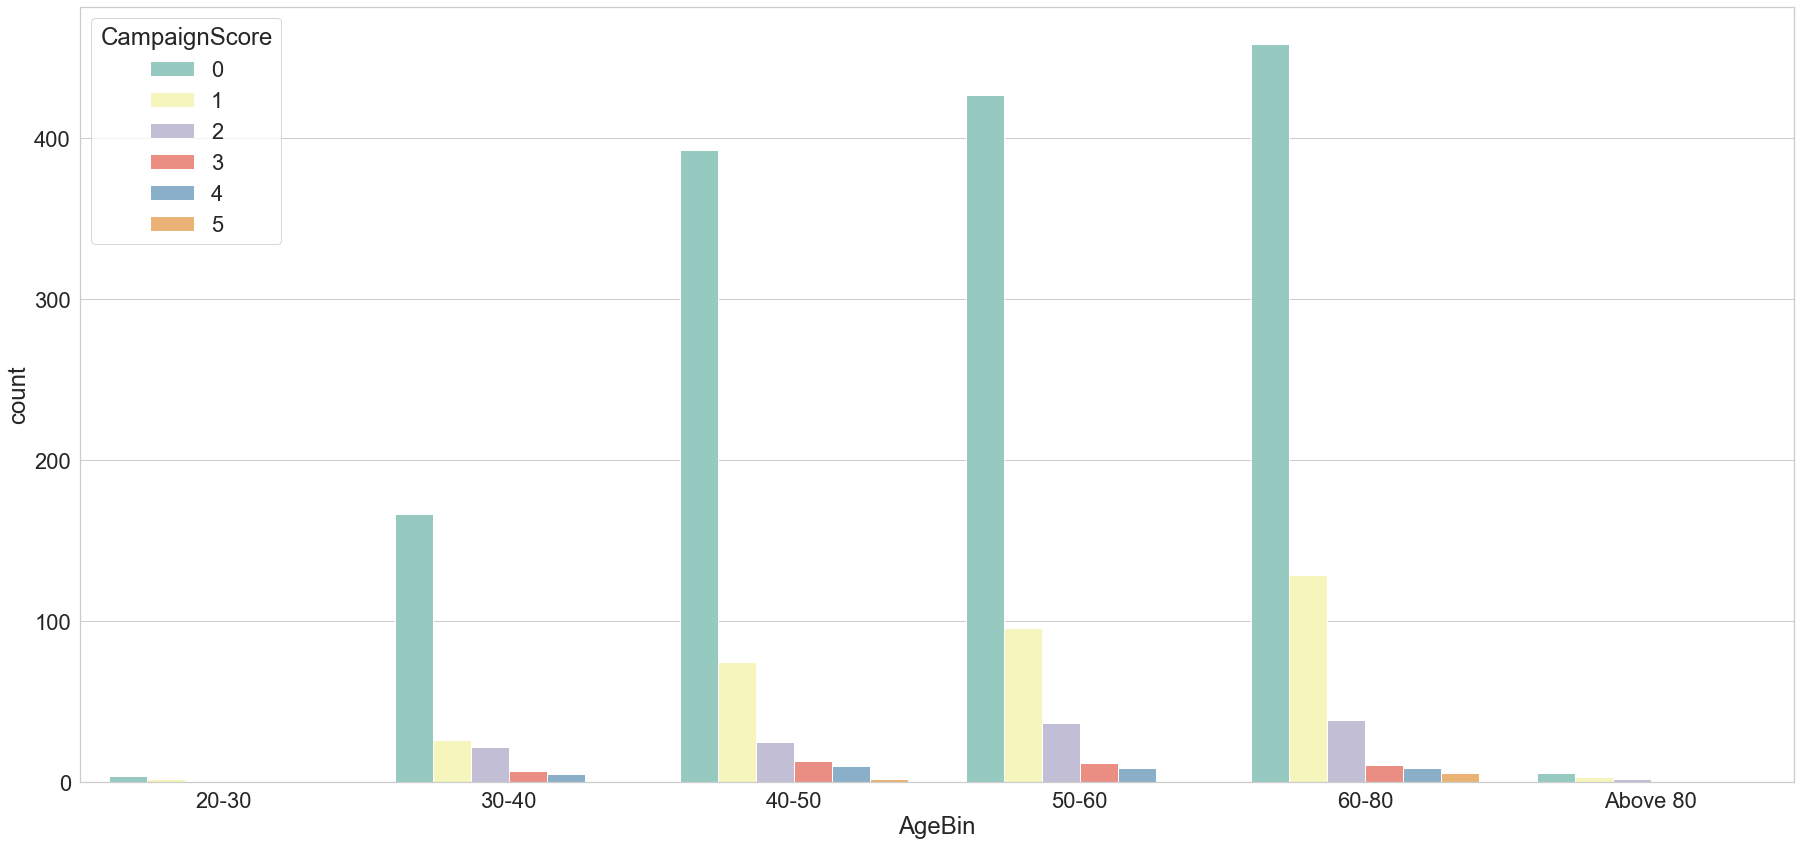

In [31]:
# ---------------------------------------------------per age--------------------------
agebins=[20, 30, 40, 50, 60,80,140]
agelabels = ["20-30","30-40","40-50","50-60","60-80","Above 80"]


data1['AgeBin'] = pd.cut(data1['Age'], bins=agebins, labels=agelabels, right=False)
#print (df)


sns.countplot(x="AgeBin",hue="CampaignScore", data=data1,palette="Set3")
sns.set(rc={'figure.figsize':(30.7,14.27)},style="whitegrid", palette="pastel", color_codes=True,font_scale = 2)



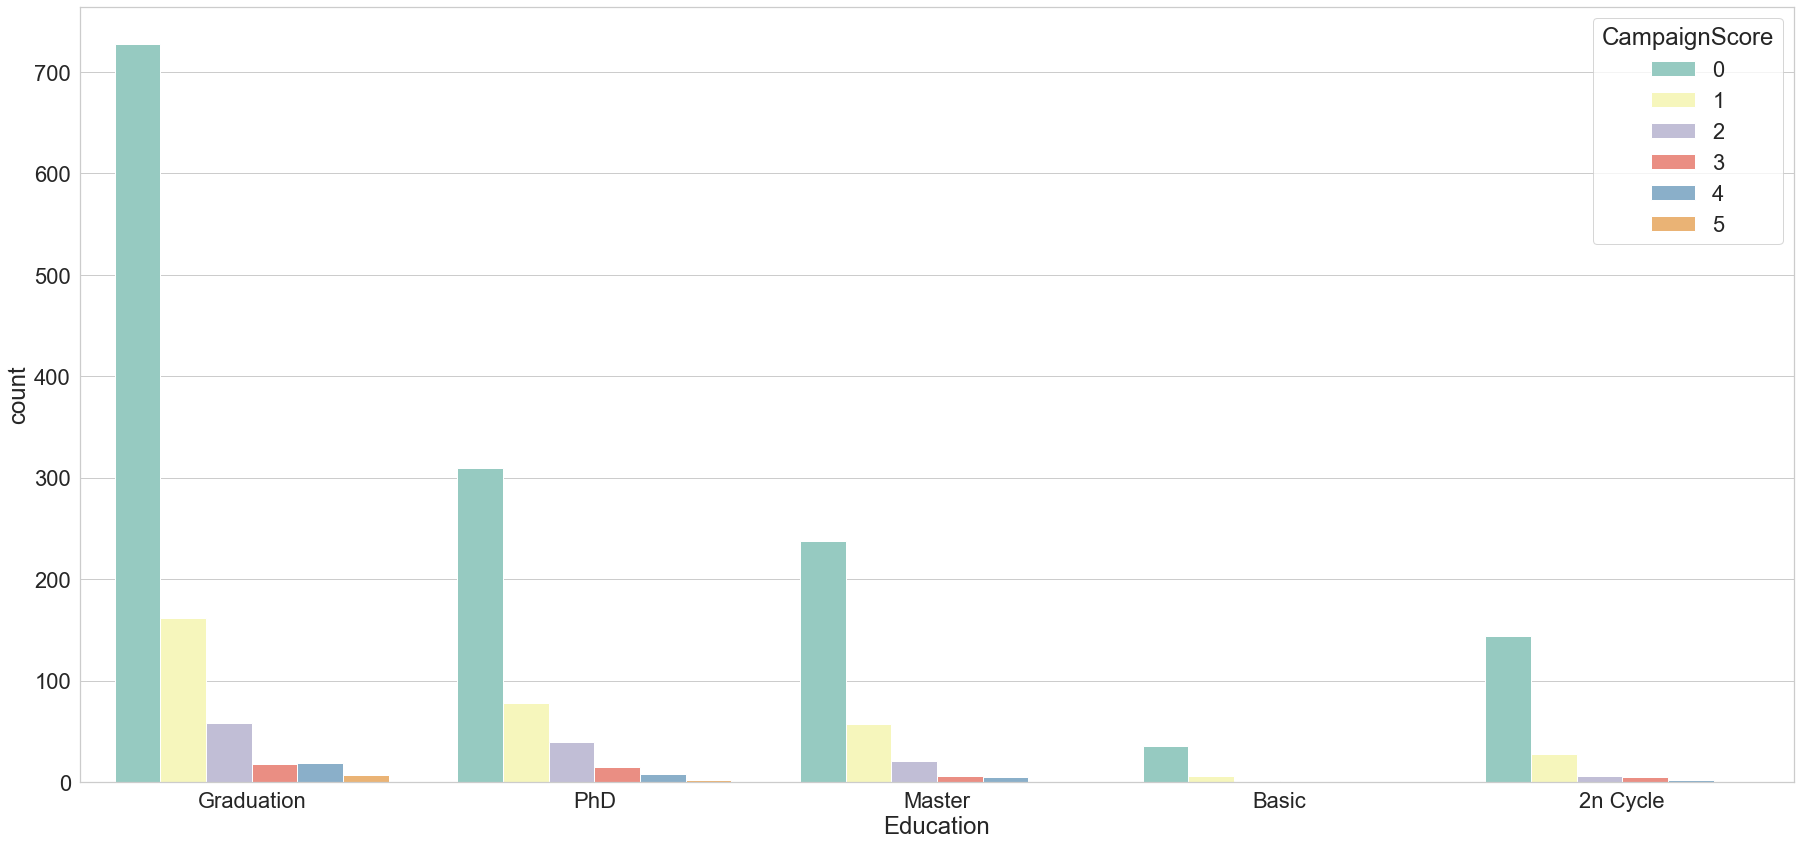

In [5]:
#---------------------------------------------------per education
edugraph=sns.countplot(x="Education",hue="CampaignScore", data=data1,palette="Set3")




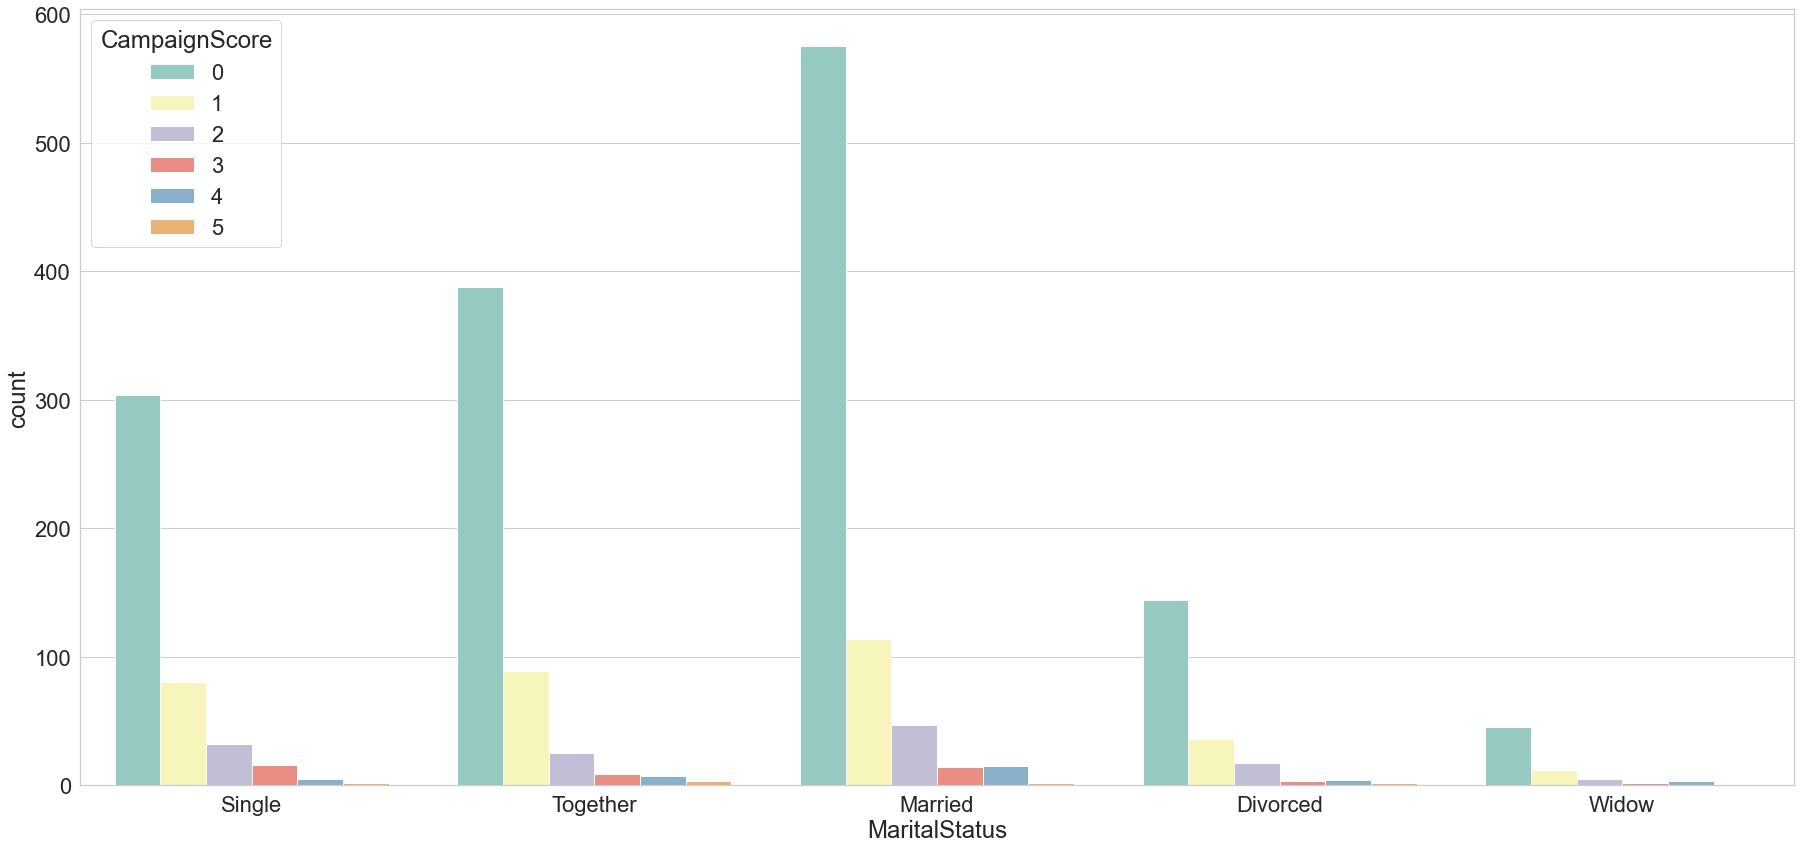

In [6]:
#---------------------------------------------------per marital status
marigraph=sns.countplot(x="MaritalStatus",hue="CampaignScore", data=data1,palette="Set3")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Single-Graduation'),
  Text(1, 0, 'Together-Graduation'),
  Text(2, 0, 'Married-PhD'),
  Text(3, 0, 'Together-Master'),
  Text(4, 0, 'Divorced-Graduation'),
  Text(5, 0, 'Together-PhD'),
  Text(6, 0, 'Married-Graduation'),
  Text(7, 0, 'Married-Basic'),
  Text(8, 0, 'Divorced-Master'),
  Text(9, 0, 'Single-PhD'),
  Text(10, 0, 'Married-Master'),
  Text(11, 0, 'Single-2n Cycle'),
  Text(12, 0, 'Divorced-PhD'),
  Text(13, 0, 'Single-Master'),
  Text(14, 0, 'Married-2n Cycle'),
  Text(15, 0, 'Widow-Graduation'),
  Text(16, 0, 'Widow-PhD'),
  Text(17, 0, 'Together-2n Cycle'),
  Text(18, 0, 'Together-Basic'),
  Text(19, 0, 'Divorced-Basic'),
  Text(20, 0, 'Divorced-2n Cycle'),
  Text(21, 0, 'Widow-Master'),
  Text(22, 0, 'Widow-2n Cycle'),
  Text(23, 0, 'Single-Basic')])

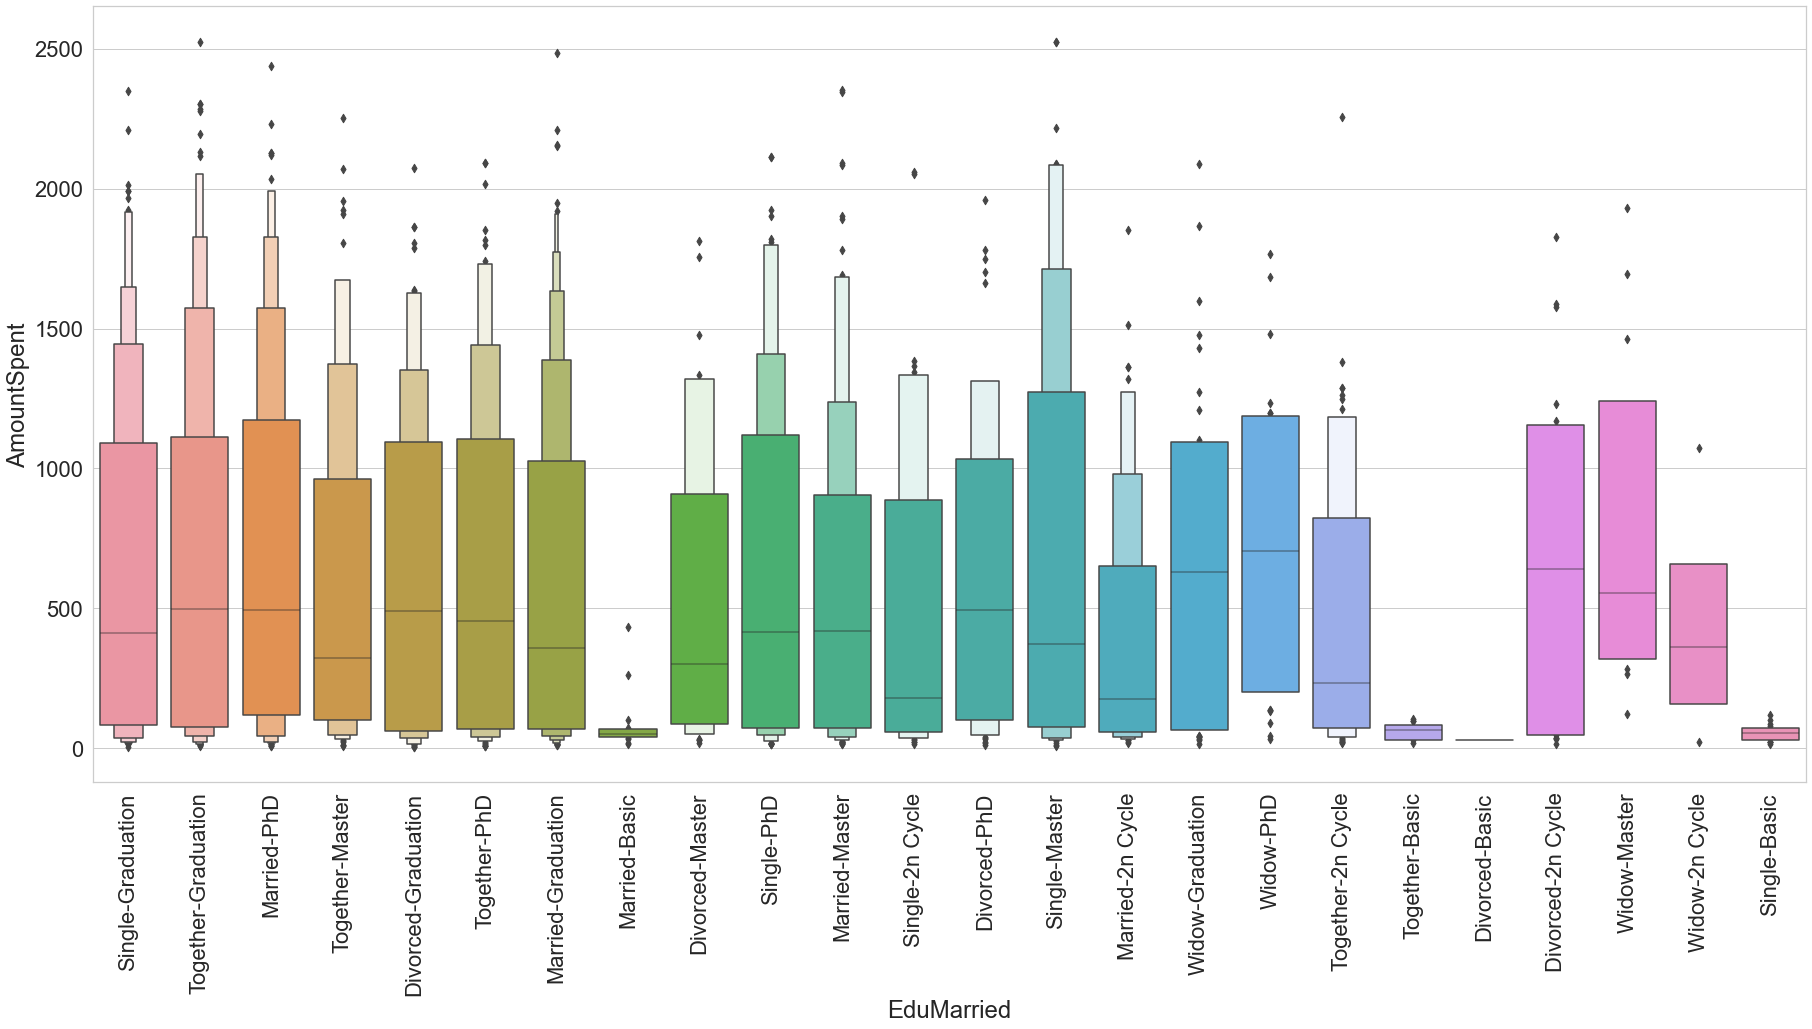

In [7]:
sns.boxenplot(data=data1, x="EduMarried", y="AmountSpent")
plt.xticks(rotation=90)

#g.fig.set_size_inches(50,15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Single-Graduation'),
  Text(1, 0, 'Together-Graduation'),
  Text(2, 0, 'Married-PhD'),
  Text(3, 0, 'Together-Master'),
  Text(4, 0, 'Divorced-Graduation'),
  Text(5, 0, 'Together-PhD'),
  Text(6, 0, 'Married-Graduation'),
  Text(7, 0, 'Married-Basic'),
  Text(8, 0, 'Divorced-Master'),
  Text(9, 0, 'Single-PhD'),
  Text(10, 0, 'Married-Master'),
  Text(11, 0, 'Single-2n Cycle'),
  Text(12, 0, 'Divorced-PhD'),
  Text(13, 0, 'Single-Master'),
  Text(14, 0, 'Married-2n Cycle'),
  Text(15, 0, 'Widow-Graduation'),
  Text(16, 0, 'Widow-PhD'),
  Text(17, 0, 'Together-2n Cycle'),
  Text(18, 0, 'Together-Basic'),
  Text(19, 0, 'Divorced-Basic'),
  Text(20, 0, 'Divorced-2n Cycle'),
  Text(21, 0, 'Widow-Master'),
  Text(22, 0, 'Widow-2n Cycle'),
  Text(23, 0, 'Single-Basic')])

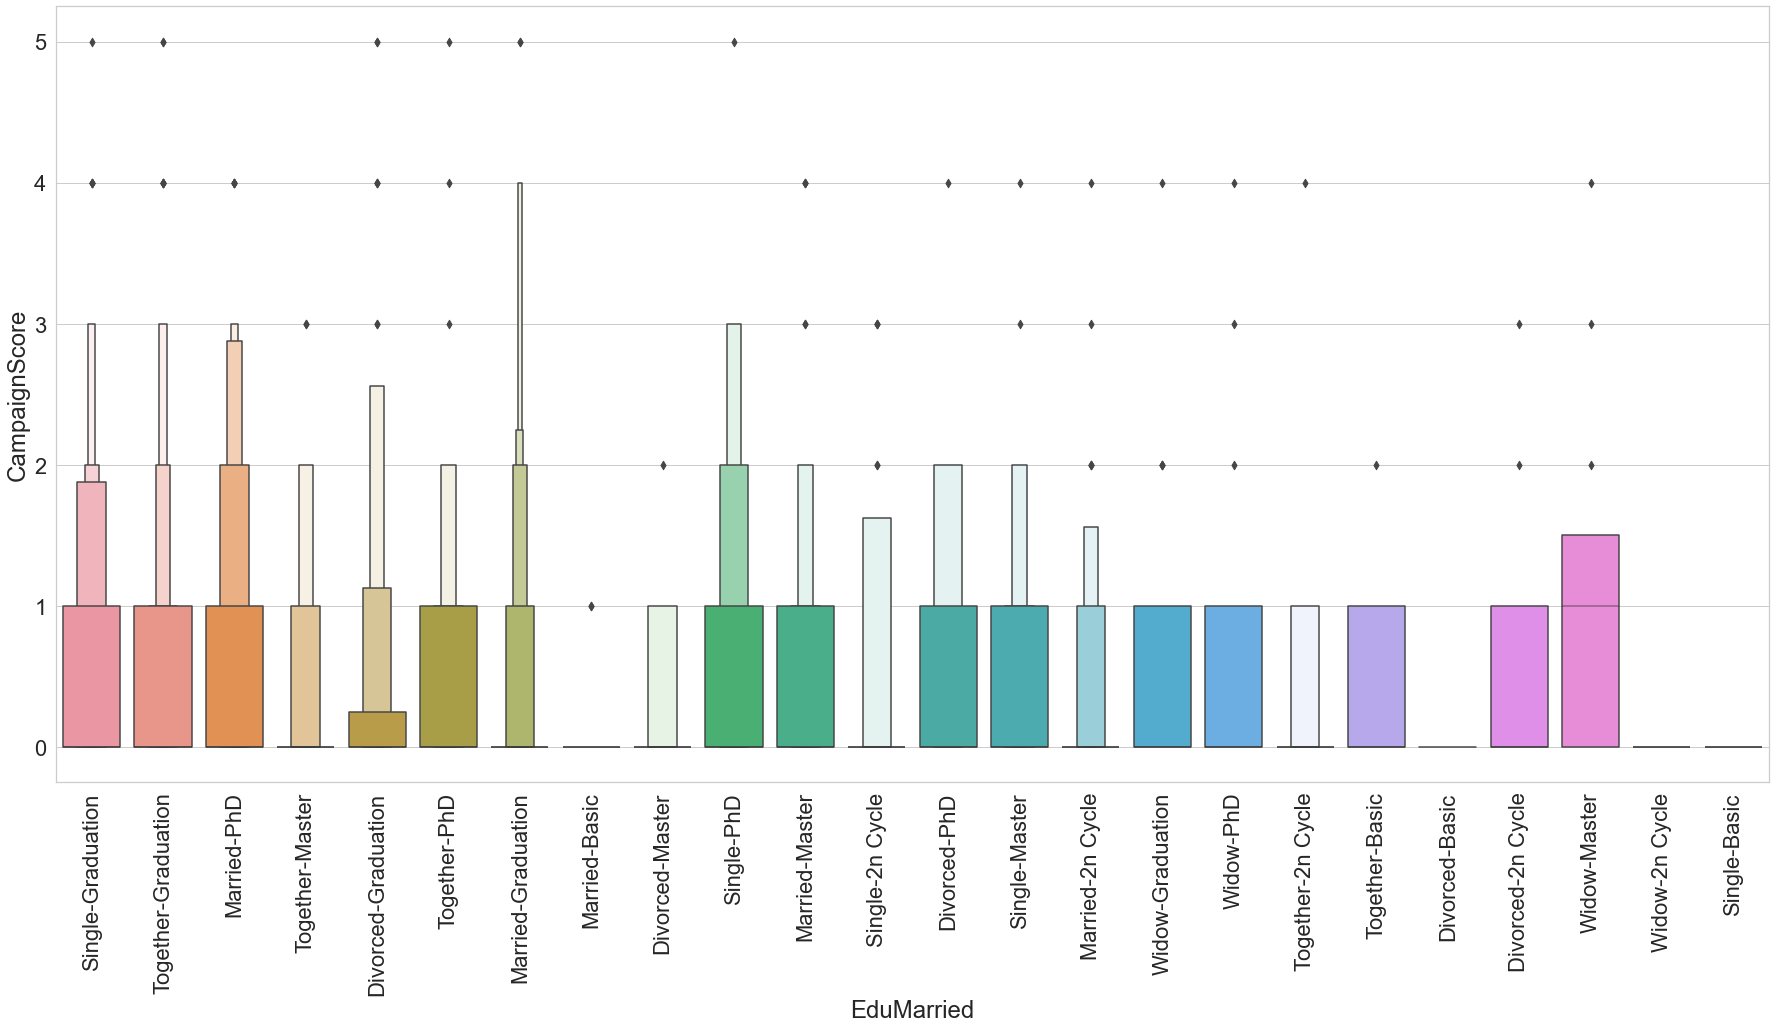

In [8]:
sns.boxenplot(data=data1, x="EduMarried", y="CampaignScore")
plt.xticks(rotation=90)


In [9]:
data1.groupby('EduMarried').agg({'EduMarried':'size', 'CampaignScore':'mean','AmountSpent':'mean','AmountSpent':'mean',
                                 'YearlyIncome':'mean'})

,EduMarried,CampaignScore,AmountSpent,YearlyIncome
EduMarried,,,,
Divorced-2n Cycle,20,0.500000,654.150000,49345.000000
Divorced-Basic,1,0.000000,29.000000,9548.000000
Divorced-Graduation,104,0.509615,628.682692,55696.653846
Divorced-Master,32,0.218750,552.968750,49919.031250
Divorced-PhD,49,0.714286,644.469388,52931.020408
Married-2n Cycle,72,0.347222,407.444444,44823.263889
Married-Basic,15,0.133333,89.133333,21928.200000
Married-Graduation,377,0.395225,599.278515,50639.938992
Married-Master,124,0.435484,587.491935,53594.975806


In [10]:
data1.groupby(['MaritalStatus']).agg({'MaritalStatus':'size', 'CampaignScore':'mean','WebsiteVisitsLastMonth':'mean','AmountSpent':'mean',
                                 'YearlyIncome':'mean'})

,MaritalStatus,CampaignScore,WebsiteVisitsLastMonth,AmountSpent,YearlyIncome
MaritalStatus,,,,,
Divorced,206,0.509709,5.480583,620.237864,53300.626214
Married,767,0.417210,5.337679,591.821382,51371.329857
Single,439,0.505695,5.277904,604.464692,50226.594533
Together,521,0.401152,5.255278,619.761996,52205.679463
Widow,67,0.597015,5.029851,722.955224,56158.895522


In [11]:
data1.groupby(['Education','CampaignScore']).agg({'Education':'size', 'CampaignScore':'mean','WebsiteVisitsLastMonth':'mean','AmountSpent':'mean',
                                 'YearlyIncome':'mean'})

Education  CampaignScore  WebsiteVisitsLastMonth  \
Education  CampaignScore                                                     
2n Cycle   0                    144            0.0                5.541667   
           1                     28            1.0                5.392857   
           2                      6            2.0                5.333333   
           3                      5            3.0                6.000000   
           4                      2            4.0                2.000000   
Basic      0                     36            0.0                6.944444   
           1                      6            1.0                7.000000   
           2                      1            2.0                8.000000   
Graduation 0                    728            0.0                5.410714   
           1                    162            1.0                5.098765   
           2                     58            2.0                4.689655   
           3                     18            3.0                3.777778   
           4                     19            4.0                3.631579   
           5                      7            5.0                3.714286   
Master     0                    238            0.0                5.306723   
           1                     57            1.0                5.403509   
           2                     21            2.0                4.952381   
           3                      6            3.0                1.833333   
           4                      5            4.0                3.600000   
PhD        0                    310            0.0                5.261290   
           1                     78            1.0                5.615385   
           2                     40            2.0                5.675000   
           3                     15            3.0                3.933333   
           4                      8            4.0                4.000000   
           5                      2            5.0                4.500000   

                          AmountSpent  YearlyIncome  
Education  CampaignScore                             
2n Cycle   0               362.631944  43363.944444  
           1               769.285714  54998.178571  
           2               931.500000  63879.500000  
           3              1330.200000  73295.600000  
           4              1533.000000  89436.500000  
Basic      0                69.583333  20467.166667  
           1                66.500000  17481.166667  
           2                18.000000  27190.000000  
Graduation 0               478.581044  48136.512363  
           1               856.061728  58550.753086  
           2              1117.034483  60297.500000  
           3              1430.444444  79534.888889  
           4              1887.473684  81951.000000  
           5              1691.000000  86263.857143  
Master     0               460.357143  49301.474790  
           1               835.385965  57271.614035  
           2              1184.333333  62141.190476  
           3              1790.166667  80657.500000  
           4              1472.200000  84793.600000  
PhD        0               521.722581  52214.074194  
           1               874.756410  57922.217949  
           2               923.750000  58179.675000  
           3              1398.666667  76410.133333  
           4              1352.250000  79333.250000  
           5              1105.500000  84662.500000

Α model for predicting ROI

a. When did the campaigns run? how many clicks did they amount to? we only have last month data.
If they run last month then we can calculate the cost per click. Otherwise we will need the amount of visits for the time the campaigns run. When we set the timelines straight we can proceed to calculate amount spent over marketing cost (which is 6*50=300).
    
b. It follows that the only way to move forward  is to assume that the amounts were spent in the last month and the campaigns run in the same period. In normal working cirqumstances more data would be needed if the assumption does not hold.

In [13]:
def round_mean(x):
    return round(x.mean(), 2)

In [32]:
data1['ROI']=round(data1.AmountSpent/300,2)
#First let's get the current ROI
round_mean(data1['ROI'])

2.03

In [27]:
#Now let's start exploring over categorical data
data1.groupby('NumberOfKids').agg({'NumberOfKids':'size','ROI':round_mean, 
                                   'CampaignScore':round_mean,'WebsiteVisitsLastMonth':round_mean,
                                   'AmountSpent':round_mean,'YearlyIncome':round_mean}).rename(columns={'NumberOfKids':'Customers'})

,Customers,ROI,CampaignScore,WebsiteVisitsLastMonth,AmountSpent,YearlyIncome
NumberOfKids,,,,,,
0,580,3.70,0.86,3.46,1108.53,65618.96
1,996,1.57,0.30,5.95,469.69,46701.07
2,377,0.84,0.24,6.32,252.13,44487.76
3,47,0.89,0.19,6.47,267.57,43571.81


ROI under 1 means negative return on the campaign. We see already that having 0 kids or 1 kids has a positive effect on ROI.

In [28]:
data1.groupby(['Education',]).agg({'Education':'size','ROI':round_mean, 
                                   'CampaignScore':round_mean,'WebsiteVisitsLastMonth':round_mean,
                                   'AmountSpent':round_mean,'YearlyIncome':round_mean}).rename(columns={'Education':'Customers'})

,Customers,ROI,CampaignScore,WebsiteVisitsLastMonth,AmountSpent,YearlyIncome
Education,,,,,,
2n Cycle,185,1.60,0.34,5.49,481.43,47097.22
Basic,43,0.23,0.19,6.98,67.95,20206.86
Graduation,992,2.10,0.45,5.24,630.37,52034.68
Master,327,2.04,0.42,5.21,612.09,52633.37
PhD,453,2.21,0.54,5.29,664.29,55147.08


Basic education has a very negative effect on ROI

In [16]:
data1.groupby(['MaritalStatus']).agg({'MaritalStatus':'size','ROI':round_mean, 
                                   'CampaignScore':round_mean,'WebsiteVisitsLastMonth':round_mean,
                                      'AmountSpent':round_mean,'YearlyIncome':round_mean})

,MaritalStatus,ROI,CampaignScore,WebsiteVisitsLastMonth,AmountSpent,YearlyIncome
MaritalStatus,,,,,,
Divorced,206,2.07,0.51,5.48,620.24,53300.63
Married,767,1.97,0.42,5.34,591.82,51371.33
Single,439,2.01,0.51,5.28,604.46,50226.59
Together,521,2.07,0.40,5.26,619.76,52205.68
Widow,67,2.41,0.60,5.03,722.96,56158.90


In [17]:
data1.groupby(['AgeBin']).agg({'AgeBin':'size','ROI':round_mean,'CampaignScore':round_mean,
                               'WebsiteVisitsLastMonth':round_mean,'AmountSpent':round_mean,'YearlyIncome':round_mean})

,AgeBin,ROI,CampaignScore,WebsiteVisitsLastMonth,AmountSpent,YearlyIncome
AgeBin,,,,,,
20-30,9,2.55,1.22,4.78,764.56,55815.22
30-40,228,1.90,0.51,5.45,570.80,44438.75
40-50,518,1.72,0.41,5.57,516.94,48709.21
50-60,581,1.93,0.42,5.55,577.49,51263.64
60-80,653,2.38,0.47,4.87,715.34,56729.92
Above 80,11,3.32,0.64,3.73,996.09,63497.00


In [30]:
data1[(data1.Education!='Basic')].groupby(['AgeBin','NumberOfKids']).agg({'AgeBin':'size','ROI':round_mean,
                                'CampaignScore':round_mean,'WebsiteVisitsLastMonth':round_mean,'AmountSpent':round_mean,
                                'YearlyIncome':round_mean}).rename(columns={'AgeBin':'Customers'})

Customers   ROI  CampaignScore  WebsiteVisitsLastMonth  \
AgeBin   NumberOfKids                                                           
20-30    0                     8  2.86           1.25                    4.75   
         1                     0   NaN            NaN                     NaN   
         2                     0   NaN            NaN                     NaN   
         3                     0   NaN            NaN                     NaN   
30-40    0                   100  3.51           0.84                    3.65   
         1                   110  0.70           0.27                    6.81   
         2                     3  0.85           0.00                    6.33   
         3                     0   NaN            NaN                     NaN   
40-50    0                   114  3.83           1.02                    3.39   
         1                   306  1.27           0.25                    6.18   
         2                    79  0.80           0.23                    6.13   
         3                     4  0.43           0.00                    5.00   
50-60    0                   113  4.14           0.82                    3.25   
         1                   290  1.73           0.35                    5.87   
         2                   152  0.85           0.28                    6.41   
         3                    20  0.89           0.15                    6.75   
60-80    0                   223  3.70           0.83                    3.27   
         1                   260  2.25           0.32                    5.27   
         2                   141  0.86           0.23                    6.35   
         3                    23  0.97           0.26                    6.48   
Above 80 0                     9  4.03           0.78                    3.56   
         1                     2  0.15           0.00                    4.50   
         2                     0   NaN            NaN                     NaN   
         3                     0   NaN            NaN                     NaN   

                       AmountSpent  YearlyIncome  
AgeBin   NumberOfKids                             
20-30    0                  858.12      60989.50  
         1                     NaN           NaN  
         2                     NaN           NaN  
         3                     NaN           NaN  
30-40    0                 1052.70      61163.89  
         1                  209.70      33157.55  
         2                  255.67      31450.67  
         3                     NaN           NaN  
40-50    0                 1147.57      68714.04  
         1                  381.39      42946.93  
         2                  239.72      47149.91  
         3                  127.25      53892.00  
50-60    0                 1240.64      68613.99  
         1                  519.26      49534.72  
         2                  256.39      44273.27  
         3                  268.45      40574.95  
60-80    0                 1110.56      67230.40  
         1                  676.33      56535.93  
         2                  257.10      43915.48  
         3                  291.22      44382.96  
Above 80 0                 1207.78      66849.44  
         1                   43.50      48411.00  
         2                     NaN           NaN  
         3                     NaN           NaN

In [19]:
#using the above findings we can create a simple model, reaching only the best target group

filter1=data1.Education!='Basic'
filter2= (data1.NumberOfKids==0)|((data1.NumberOfKids==1) & (data1.AgeBin!='30-40'))


,ID,YearOfBirth,Education,MaritalStatus,YearlyIncome,CustomerStartDateTime,DaysSinceLastPurchase,AmountSpentClothingProducts,AmountSpentCandyProducts,AmountSpentOfficeProducts,...,Campaign2Result,Complain,Campaign6Result,NumberOfKids,AmountSpent,CampaignScore,Age,EduMarried,AgeBin,ROI
0,13340,1957,Graduation,Single,58138,2012-09-04,58,635,88,546,...,0,0,1,0,1617,1,66,Single-Graduation,60-80,5.39
2,4478,1965,Graduation,Together,71613,2013-08-21,26,426,49,127,...,0,0,0,0,776,0,58,Together-Graduation,50-60,2.59
4,2890,1981,PhD,Married,58293,2014-01-19,94,173,43,118,...,0,0,0,1,422,0,42,Married-PhD,40-50,1.41
5,11375,1967,Master,Together,62513,2013-09-09,16,520,42,98,...,0,0,0,1,716,0,56,Together-Master,50-60,2.39
6,5029,1971,Graduation,Divorced,55635,2012-11-13,34,235,65,164,...,0,0,0,1,590,0,52,Divorced-Graduation,50-60,1.97


In [20]:
roimax=data1[filter1&filter2]
print(roimax.ID.count())
#575 users were left out

round_mean(roimax.ROI)
#average ROI went from 2.03 to 2.54 offering us a 25% increase
#the model ends here the aggregations below are maintained for completion

1425


2.54

In [21]:
roimax.groupby(['NumberOfKids','Education','AgeBin']).agg({'MaritalStatus':'size','ROI':round_mean,
                                'CampaignScore':round_mean,'WebsiteVisitsLastMonth':round_mean,'AmountSpent':round_mean,
                                                                          'YearlyIncome':round_mean})

MaritalStatus   ROI  CampaignScore  \
NumberOfKids Education  AgeBin                                         
0            2n Cycle   20-30                 2  2.48           2.00   
                        30-40                10  1.31           0.20   
                        40-50                16  2.70           0.75   
                        50-60                10  3.16           0.80   
                        60-80                19  3.06           0.79   
                        Above 80              0   NaN            NaN   
             Graduation 20-30                 6  2.99           1.00   
                        30-40                53  3.54           0.81   
                        40-50                53  3.96           1.04   
                        50-60                64  4.02           0.94   
                        60-80               117  3.64           0.79   
                        Above 80              0   NaN            NaN   
             Master     20-30                 0   NaN            NaN   
                        30-40                15  4.06           1.00   
                        40-50                19  3.56           0.89   
                        50-60                13  4.71           0.69   
                        60-80                43  3.91           0.63   
                        Above 80              2  4.39           0.50   
             PhD        20-30                 0   NaN            NaN   
                        30-40                22  4.06           1.09   
                        40-50                26  4.43           1.23   
                        50-60                26  4.51           0.62   
                        60-80                44  3.94           1.18   
                        Above 80              7  3.92           0.86   
1            2n Cycle   20-30                 0   NaN            NaN   
                        30-40                 0   NaN            NaN   
                        40-50                42  1.21           0.26   
                        50-60                19  1.76           0.00   
                        60-80                13  2.23           0.15   
                        Above 80              2  0.15           0.00   
             Graduation 20-30                 0   NaN            NaN   
                        30-40                 0   NaN            NaN   
                        40-50               162  1.37           0.20   
                        50-60               141  1.76           0.38   
                        60-80               128  2.28           0.31   
                        Above 80              0   NaN            NaN   
             Master     20-30                 0   NaN            NaN   
                        30-40                 0   NaN            NaN   
                        40-50                42  0.96           0.33   
                        50-60                61  1.48           0.36   
                        60-80                44  2.03           0.32   
                        Above 80              0   NaN            NaN   
             PhD        20-30                 0   NaN            NaN   
                        30-40                 0   NaN            NaN   
                        40-50                60  1.26           0.35   
                        50-60                69  1.88           0.38   
                        60-80                75  2.35           0.35   
                        Above 80              0   NaN            NaN   

                                  WebsiteVisitsLastMonth  AmountSpent  \
NumberOfKids Education  AgeBin                                          
0            2n Cycle   20-30                       7.50       743.50   
                        30-40                       4.50       394.80   
                        40-50                       5.00       810.44   
                        50-60                       3.20       947.8

In [22]:
data1[data1.Education!='Basic'].groupby(['MaritalStatus','NumberOfKids']).agg({'MaritalStatus':'size','ROI':round_mean,
                                'CampaignScore':round_mean,'WebsiteVisitsLastMonth':round_mean,'AmountSpent':round_mean,
                                                                          'YearlyIncome':round_mean})

MaritalStatus   ROI  CampaignScore  \
MaritalStatus NumberOfKids                                       
Divorced      0                        53  3.29           1.13   
              1                       106  1.98           0.26   
              2                        41  0.97           0.41   
              3                         5  0.31           0.00   
Married       0                       203  3.65           0.81   
              1                       379  1.63           0.31   
              2                       154  0.85           0.21   
              3                        16  1.10           0.12   
Single        0                       149  3.84           0.93   
              1                       194  1.30           0.32   
              2                        66  0.72           0.23   
              3                        15  0.63           0.33   
Together      0                       139  4.05           0.78   
              1                       259  1.59           0.27   
              2                       100  0.86           0.23   
              3                        11  1.21           0.18   
Widow         0                        23  3.86           1.04   
              1                        30  2.03           0.40   
              2                        14  0.85           0.29   

                            WebsiteVisitsLastMonth  AmountSpent  YearlyIncome  
MaritalStatus NumberOfKids                                                     
Divorced      0                               3.89       986.92      65245.02  
              1                               5.92       594.27      50775.08  
              2                               6.15       292.05      47508.27  
              3                               7.20        93.20      36479.60  
Married       0                               3.34      1094.55      65709.59  
              1                               5.87       490.09      47631.07  
              2                               6.34       255.53      45264.77  
              3                               6.69       331.19      44430.69  
Single        0                               3.53      1153.23      66734.55  
              1                               6.04       389.66      43727.11  
              2                               6.38       216.30      41427.83  
              3                               6.60       188.20      41224.00  
Together      0                               3.05      1213.73      68778.46  
              1                               5.88       477.61      47924.11  
              2                               6.46       257.79      44303.30  
              3                               5.64       362.55      48747.82  
Widow         0                               3.61      1158.04      64540.17  
              1                               5.87       608.53      54019.57  
              2                               5.57       253.36      46973.93

In [23]:
data1.groupby(['NumberOfKids','Education']).agg({'NumberOfKids':'size','ROI':round_mean,
                                'CampaignScore':round_mean,'WebsiteVisitsLastMonth':round_mean,'AmountSpent':round_mean,
                                                                          'YearlyIncome':round_mean})

NumberOfKids   ROI  CampaignScore  \
NumberOfKids Education                                       
0            2n Cycle              57  2.65           0.72   
             Basic                 13  0.33           0.08   
             Graduation           293  3.75           0.87   
             Master                92  3.98           0.75   
             PhD                  125  4.18           1.04   
1            2n Cycle              93  1.31           0.17   
             Basic                 28  0.18           0.25   
             Graduation           504  1.63           0.29   
             Master               156  1.43           0.35   
             PhD                  215  1.82           0.34   
2            2n Cycle              32  0.70           0.19   
             Basic                  2  0.21           0.00   
             Graduation           173  0.84           0.21   
             Master                73  1.02           0.18   
             PhD                   97  0.76           0.37   
3            2n Cycle               3  0.49           0.00   
             Graduation            22  0.93           0.18   
             Master                 6  0.56           0.00   
             PhD                   16  1.04           0.31   

                         WebsiteVisitsLastMonth  AmountSpent  YearlyIncome  
NumberOfKids Education                                                      
0            2n Cycle                      4.26       794.77      55657.60  
             Basic                         6.77        97.92      21068.31  
             Graduation                    3.39      1125.01      67056.89  
             Master                        3.20      1195.30      65624.34  
             PhD                           3.11      1254.22      71420.14  
1            2n Cycle                      6.02       393.41      43497.48  
             Basic                         7.29        54.39      20140.61  
             Graduation                    5.89       487.80      46740.02  
             Master                        5.75       428.09      48062.01  
             PhD                           6.01       544.52      50467.04  
2            2n Cycle                      5.88       210.53      42864.53  
             Basic                         4.00        63.00      15535.00  
             Graduation                    6.39       252.69      43494.31  
             Master                        6.44       306.81      46599.36  
             PhD                           6.29       227.61      45802.90  
3            2n Cycle                      8.00       146.33      41190.33  
             Graduation                    6.05       278.68      40420.18  
             Master                        7.17       168.00      45707.67  
             PhD                           6.50       312.38      47550.88